In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count') # Grouping of all areatypes in area_type column then counting the aggregate

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(["area_type","society","availability"],axis='columns')

In [6]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df2.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
df2.isnull().sum() 

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

Now if we want to fill these na values we can use mean but as our dataset it pretty big enough so we will remove these values

In [9]:
df3 = df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df3['size'].unique() # Here 4 BHK and 4 bedroom are the same so we will fix it

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_9156\3620022870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [12]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


Here you can see that there is a house with 43 bedrooms but with only 2400ft area this is an error 

In [13]:

df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:float(x)
    except:return False
    return True


In [15]:
df3[df3['total_sqft'].apply(is_float)] # Here you can see all the numbers which are floats but if you put a tilde sign (~) then you can see those which are not float

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [16]:
df3[~df3['total_sqft'].apply(is_float)].head(10) # Nigget Operation

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2: return (float(tokens[0]) + float(tokens[1]))/2
    try:return float(x)
    except:return None

In [18]:
convert_sqft_to_num('2212')

2212.0

In [19]:
convert_sqft_to_num('220 - 1203')

711.5

In [20]:
convert_sqft_to_num("hello")

In [21]:
df4 = df3.copy()

In [22]:
df4.total_sqft = df4['total_sqft'].apply(convert_sqft_to_num)

In [23]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
balcony           0.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [24]:
df4.isna().sum()

location       0
size           0
total_sqft    42
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [25]:
df5 = df4.copy()


In [26]:
df5.describe()

,total_sqft,bath,balcony,price,bhk
count,12668.000000,12710.000000,12710.000000,12710.000000,12710.000000
mean,1511.835167,2.617309,1.584343,106.060778,2.737136
std,1162.097276,1.226000,0.817287,131.766089,1.205097
min,5.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,49.030000,2.000000
50%,1260.000000,2.000000,2.000000,70.000000,3.000000
75%,1640.000000,3.000000,2.000000,115.000000,3.000000
max,52272.000000,40.000000,3.000000,2912.000000,43.000000


In [27]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [28]:
len(df5['location'].unique())

1265

In [29]:
df5['location'].shape # High Dimensionality curse

(12710,)

In [30]:
df5['location'] = df5.location.apply(lambda x: x.strip())


In [31]:
location_stats = df5.groupby('location')['location'].agg('count')
location_stats.sort_values(ascending=False)

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [32]:
len(location_stats[location_stats<=10]) # Here it means that there are 1017 location which have less than 10 entries

1017

In [33]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10.sort_values(ascending=False)


location
Basapura                10
Kodigehalli             10
Dairy Circle            10
Gunjur Palya            10
HAL 2nd Stage           10
                        ..
KAMAKIYA                 1
KG Halli                 1
KHB Colony Extension     1
KPC Layout               1
whitefiled               1
Name: location, Length: 1017, dtype: int64

In [34]:
location_stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
                                                  ..
south                                              2
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
whitefiled                                         1
Name: location, Length: 1017, dtype: int64

In [35]:
len(df5.location.unique())

1254

In [36]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [37]:
df5.head(20)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


In [38]:
len(df5.location.unique())

238

In [39]:
# Outlier Dection and removal
df5.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12668.000000,12710.000000,12710.000000,12710.000000,12710.000000,1.266800e+04
mean,1511.835167,2.617309,1.584343,106.060778,2.737136,6.876277e+03
std,1162.097276,1.226000,0.817287,131.766089,1.205097,2.263354e+04
min,5.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,49.030000,2.000000,4.242721e+03
50%,1260.000000,2.000000,2.000000,70.000000,3.000000,5.376344e+03
75%,1640.000000,3.000000,2.000000,115.000000,3.000000,7.142857e+03
max,52272.000000,40.000000,3.000000,2912.000000,43.000000,2.300000e+06


In [40]:
df5[df5['total_sqft']/df5.bhk<300].head() # This will give price per BKH 

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


Here you see the total sqft of index 58 is 1407 but there are 6 bhk which is unusual so we will remove the data like this

In [41]:
df5.shape

(12710, 8)

In [42]:
df6 = df5[~(df5['total_sqft']/df5.bhk<300)]

In [43]:
df6.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [44]:
df6.shape

(12055, 8)

In [45]:
import numpy as np

In [46]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [47]:
df7 = remove_pps_outliers(df6)

In [48]:
df7.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [49]:
df7.shape

(9848, 8)

In [50]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (7,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK' ,s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel('Total Square feet area')
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()


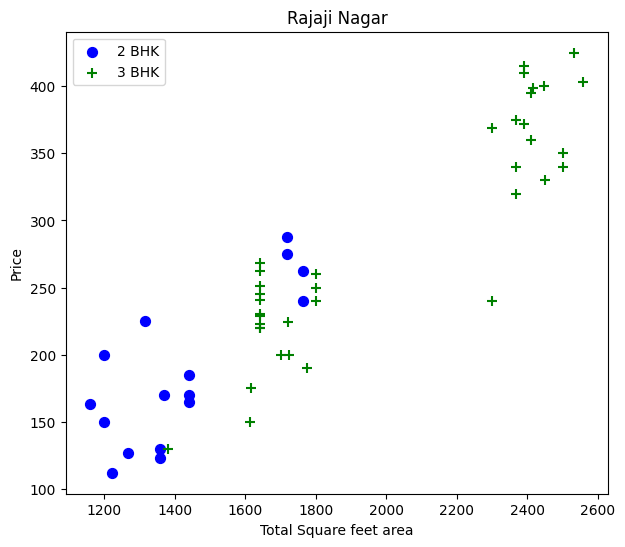

In [51]:
plot_scatter_chart(df7,'Rajaji Nagar')

In [52]:
df6.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12013.000000,12055.000000,12055.000000,12055.000000,12055.000000,12013.000000
mean,1542.315982,2.513231,1.586230,105.120959,2.608461,6206.082347
std,1181.094228,1.009891,0.809461,134.149494,0.927608,3985.518807
min,300.000000,1.000000,0.000000,9.000000,1.000000,267.829813
25%,1107.000000,2.000000,1.000000,48.450000,2.000000,4199.363057
50%,1285.000000,2.000000,2.000000,68.000000,2.000000,5252.525253
75%,1660.000000,3.000000,2.000000,110.000000,3.000000,6823.529412
max,52272.000000,13.000000,3.000000,2912.000000,13.000000,176470.588235


In [53]:
df7.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,9848.000000,9848.000000,9848.000000,9848.000000,9848.000000,9848.000000
mean,1462.362215,2.428412,1.591389,87.023928,2.533103,5587.697037
std,774.698380,0.912075,0.797054,78.866025,0.839345,2170.019794
min,300.000000,1.000000,0.000000,10.000000,1.000000,1250.000000
25%,1100.000000,2.000000,1.000000,48.000000,2.000000,4225.352113
50%,1269.360000,2.000000,2.000000,65.000000,2.000000,5142.857143
75%,1610.000000,3.000000,2.000000,96.000000,3.000000,6355.616616
max,30400.000000,13.000000,3.000000,2200.000000,13.000000,24000.000000


We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with
same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{

'1' {

'mean' 4000,

'std: 2000,

'count': 34

},

'2' {

'mean': 4300,

'std: 2300,

'count': 22
},

}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [54]:
df7.groupby('location').count()

,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
location,,,,,,,
1st Block Jayanagar,7,7,7,7,7,7,7
1st Phase JP Nagar,17,17,17,17,17,17,17
2nd Phase Judicial Layout,8,8,8,8,8,8,8
2nd Stage Nagarbhavi,6,6,6,6,6,6,6
5th Phase JP Nagar,28,28,28,28,28,28,28
...,...,...,...,...,...,...,...
Yelahanka,167,167,167,167,167,167,167
Yelahanka New Town,32,32,32,32,32,32,32
Yelenahalli,9,9,9,9,9,9,9


In [55]:
df7.shape

(9848, 8)

In [63]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index)
    return df.drop(index=exclude_indices)

In [65]:
df8 = remove_bhk_outliers(df7)

In [66]:
df8.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [67]:
df8.shape

(7025, 8)

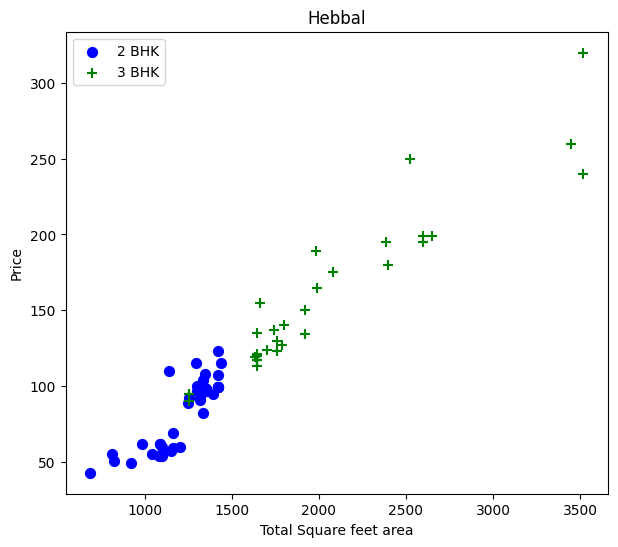

In [69]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'Coutn')

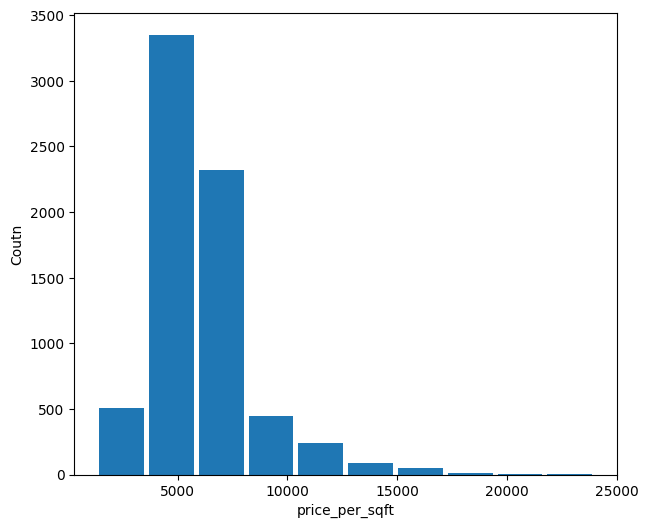

In [72]:
plt.hist(df8['price_per_sqft'],rwidth=0.9)
plt.xlabel('price_per_sqft')
plt.ylabel("Coutn")

In [ ]:
df8[df8.bath>8] # This looks fine if someone has 4.6k sqft and 9 bathrooms

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
3599,KR Puram,9 BHK,4600.0,9.0,2.0,200.0,9,4347.826087
4893,Mico Layout,9 BHK,5000.0,9.0,3.0,210.0,9,4200.000000
5415,Raja Rajeshwari Nagar,9 Bedroom,3600.0,9.0,3.0,240.0,9,6666.666667
7729,other,11 BHK,5000.0,9.0,3.0,360.0,11,7200.000000
8091,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689
9269,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [77]:
df8.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

But we will remove those which have 2 bedrooms but many bathrooms beacause this sounds unusual

Text(0, 0.5, 'Count')

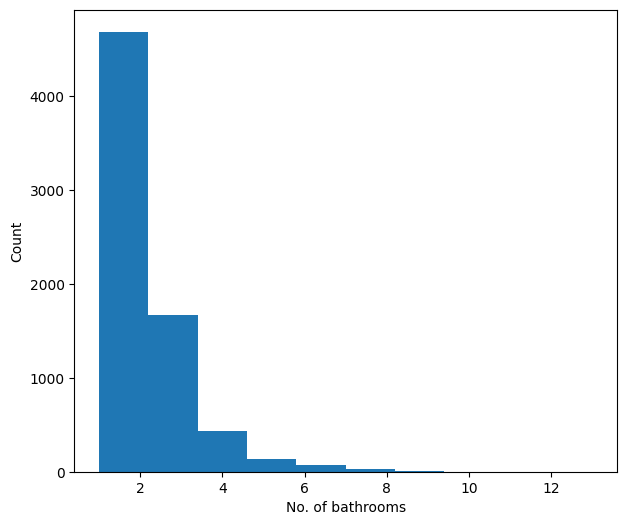

In [79]:
plt.hist(df8.bath,rwidth=1)
plt.xlabel("No. of bathrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

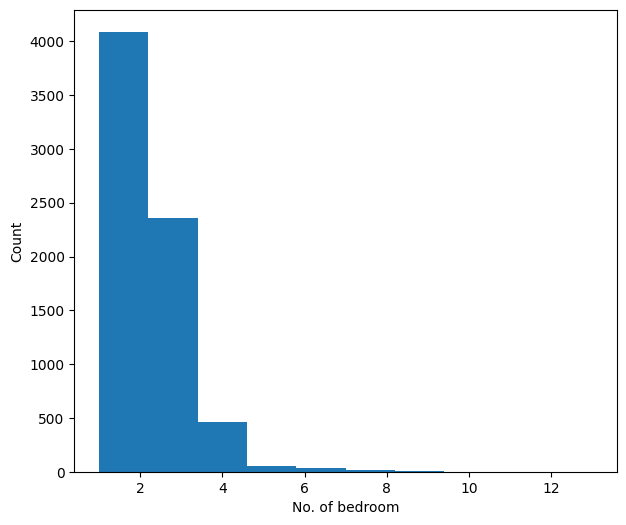

In [80]:
plt.hist(df8.bhk,rwidth=1)
plt.xlabel("No. of bedroom")
plt.ylabel("Count")

In [82]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6450,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8091,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [84]:
df8.shape

(7025, 8)

In [85]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6958, 8)

In [88]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()


,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [93]:
dummies = pd.get_dummies(df10.location).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df11 = pd.concat([df10.drop('location',axis='columns'),dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
X = df11.drop('price',axis='columns')
y = df11.price

In [98]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8572591912748346

In [104]:
from sklearn.model_selection import KFold,ShuffleSplit
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv).mean()

0.8546610287034101

In [103]:
cross_val_score(LinearRegression(),X_train,y_train,cv=cv).mean()

0.8364811705090514

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier